IMPORTING THE FILE

In [109]:
#importing the essential libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

 Data Cleaning

In [110]:
data = pd.read_csv("C:\\Users\\ASUS\\OneDrive\\Documents\\Project Work\\diabetes-dataset.csv")

In [111]:
data.shape

(2000, 9)

In [112]:
data.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138,62,35,0,33.6,0.127,47,True
1,0,84,82,31,125,38.2,0.233,23,False
2,0,145,0,0,0,44.2,0.630,31,True
3,0,135,68,42,250,42.3,0.365,24,True
4,1,139,62,41,480,40.7,0.536,21,False
5,0,173,78,32,265,46.5,1.159,58,False
6,4,99,72,17,0,25.6,0.294,28,False
7,8,194,80,0,0,26.1,0.551,67,False
8,2,83,65,28,66,36.8,0.629,24,False
9,2,89,90,30,0,33.5,0.292,42,False


# Feature Engineering.

In [113]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

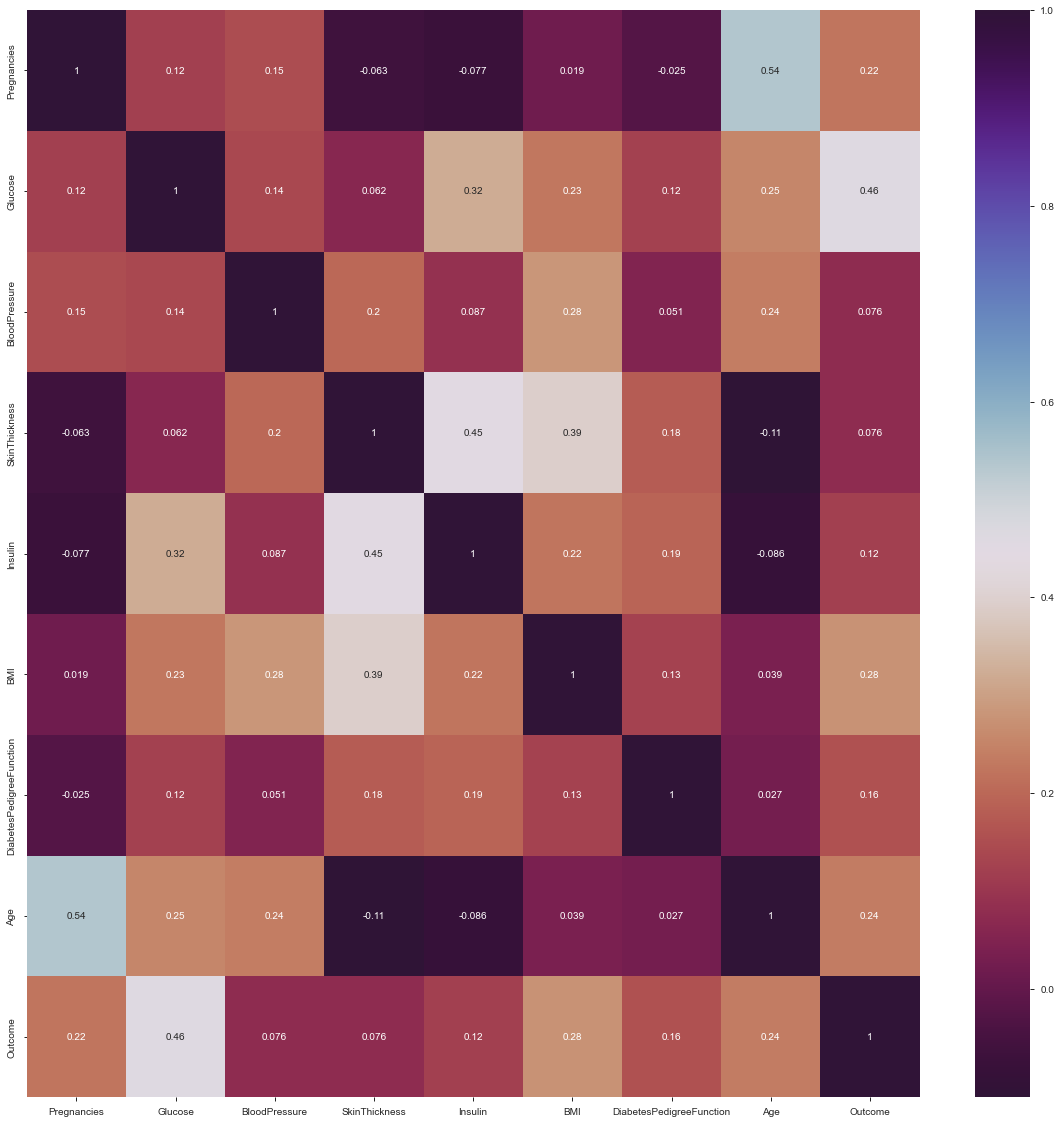

In [114]:
#Correlation 

import seaborn as sns

#1. Finding correlation of each feature in the dataset

correlation = data.corr()
top_features = correlation.index
plt.figure(figsize=(20,20))
#Plotting heatmap
heat_map = sns.heatmap(data[top_features].corr(),annot=True,cmap="twilight_shifted_r")

In [115]:
data.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.120405,0.149672,-0.063375,-0.076600,0.019475,-0.025453,0.539457,0.224437
Glucose,0.120405,1.000000,0.138044,0.062368,0.320371,0.226864,0.123243,0.254496,0.458421
BloodPressure,0.149672,0.138044,1.000000,0.198800,0.087384,0.281545,0.051331,0.238375,0.075958
SkinThickness,-0.063375,0.062368,0.198800,1.000000,0.448859,0.393760,0.178299,-0.111034,0.076040
Insulin,-0.076600,0.320371,0.087384,0.448859,1.000000,0.223012,0.192719,-0.085879,0.120924
BMI,0.019475,0.226864,0.281545,0.393760,0.223012,1.000000,0.125719,0.038987,0.276726
DiabetesPedigreeFunction,-0.025453,0.123243,0.051331,0.178299,0.192719,0.125719,1.000000,0.026569,0.155459
Age,0.539457,0.254496,0.238375,-0.111034,-0.085879,0.038987,0.026569,1.000000,0.236509
Outcome,0.224437,0.458421,0.075958,0.076040,0.120924,0.276726,0.155459,0.236509,1.000000


# Performing label encoding

In [116]:
labels = {True: 1,False: 0}

data['Outcome'] = data['Outcome'].map(labels) 

In [117]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138,62,35,0,33.6,0.127,47,1
1,0,84,82,31,125,38.2,0.233,23,0
2,0,145,0,0,0,44.2,0.630,31,1
3,0,135,68,42,250,42.3,0.365,24,1
4,1,139,62,41,480,40.7,0.536,21,0


In [118]:
#Finding the counts of True and False values

true_count = len(data.loc[data['Outcome']==True])
false_count = len(data.loc[data['Outcome']==False])

(true_count,false_count)


(684, 1316)

In [119]:
#Train_Test_Splitting

from sklearn.model_selection import train_test_split

feature_columns = ['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']

target_column = ['Outcome']


In [120]:
X = data[feature_columns].values
Y = data[target_column].values

(X,Y)



(array([[2.00e+00, 1.38e+02, 6.20e+01, ..., 3.36e+01, 1.27e-01, 4.70e+01],
        [0.00e+00, 8.40e+01, 8.20e+01, ..., 3.82e+01, 2.33e-01, 2.30e+01],
        [0.00e+00, 1.45e+02, 0.00e+00, ..., 4.42e+01, 6.30e-01, 3.10e+01],
        ...,
        [6.00e+00, 8.50e+01, 7.80e+01, ..., 3.12e+01, 3.82e-01, 4.20e+01],
        [0.00e+00, 1.29e+02, 1.10e+02, ..., 6.71e+01, 3.19e-01, 2.60e+01],
        [2.00e+00, 8.10e+01, 7.20e+01, ..., 3.01e+01, 5.47e-01, 2.50e+01]]),
 array([[1],
        [0],
        [1],
        ...,
        [0],
        [1],
        [0]], dtype=int64))

In [121]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.3, random_state = 42)


In [122]:
#Counting the 0(ZERO) values in the dataset

print("Total number of records in the dataset: {0}".format(len(data)))
print("0 values in Pregnancies:   {0}".format(len(data.loc[data['Pregnancies'] == 0])))
print("0 values in Glucose:       {:^2}".format(len(data.loc[data['Glucose'] == 0])))
print("0 values in BloodPressure: {:>2}".format(len(data.loc[data['BloodPressure'] == 0])))
print("0 values in SkinThickness: {0}".format(len(data.loc[data['SkinThickness'] == 0])))
print("0 values in Insulin:       {0}".format(len(data.loc[data['Insulin'] == 0])))
print("0 values in BMI:           {:>2}".format(len(data.loc[data['BMI'] == 0])))
print("0 values in Age:           {0}".format(len(data.loc[data['Age'] == 0])))
print("0 values in DiabetesPedigreeFunction: {0}".format(len(data.loc[data['DiabetesPedigreeFunction'] == 0])))


Total number of records in the dataset: 2000
0 values in Pregnancies:   301
0 values in Glucose:       13
0 values in BloodPressure: 90
0 values in SkinThickness: 573
0 values in Insulin:       956
0 values in BMI:           28
0 values in Age:           0
0 values in DiabetesPedigreeFunction: 0


In [123]:
#Imputing the mean values

from sklearn.impute import SimpleImputer

impute_values = SimpleImputer(missing_values=0, strategy='constant')

X_train = impute_values.fit_transform(X_train)
X_test = impute_values.transform(X_test)

In [136]:
from sklearn import svm
for k in ('linear','poly','rbf','sigmoid'):
    model = svm.SVC(kernel=k)
    model.fit(X_train,Y_train.ravel())
    y_predict = model.predict(X_train)
    
    print('The accuracy of {0} is {1:.2f}%'.format(k,(metrics.accuracy_score(Y_train,y_predict))*100))

The accuracy of linear is 77.14%
The accuracy of poly is 77.57%
The accuracy of rbf is 77.00%
The accuracy of sigmoid is 48.64%


In [124]:
#Applying the model

from sklearn.ensemble import RandomForestClassifier
random_forest_model = RandomForestClassifier(random_state=42)

random_forest_model.fit(X_train, Y_train.ravel())

RandomForestClassifier(random_state=42)

In [125]:
prediction = random_forest_model.predict(X_test)

from sklearn import metrics
print('Accuracy of the model is: {:,.2f}%'.format(metrics.accuracy_score(Y_test,prediction)*100))

Accuracy of the model is: 96.50%


In [126]:
#Testing for a random value

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler = scaler.fit(X_train)
patient = np.array([[ 0, 200., 75., 45., 0., 40., 1.5, 45]])
    
# Normalize the data with the values used in the training set
patient = scaler.transform(patient)
    
random_forest_model.predict(patient)

array([0], dtype=int64)